In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn .metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [4]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [5]:
def continuous(y):
    m=y.shape
    # y=Y.to_numpy()
    temp=np.zeros(shape=m)

    for i in range(y.shape[0]):
        if y[i] =='Iris-setosa':
            temp[i] =0
        elif y[i] =='Iris-versicolor':
            temp[i]=1
        else:
            temp[i]=2

    return temp


y_continues=continuous(y.to_numpy())

In [6]:
X_train,X_,y_train,y_=train_test_split(X,y_continues,test_size=0.4,random_state=1)
X_cv,X_test,y_cv,y_test=train_test_split(X_,y_,test_size=0.5,random_state=1)

print(f"train size {X_train.shape} , {y_train.shape}")
print(f"cross validation size {X_cv.shape} , {y_cv.shape}")
print(f"test size {X_test.shape} , {y_test.shape}")

train size (90, 4) , (90, 1)
cross validation size (30, 4) , (30, 1)
test size (30, 4) , (30, 1)


In [25]:
min_sample_split_list=[2,3,4,5,8,9,10,15,20,25]
max_depth_list=[2,3,4,5,6,8,10,15,None]
n_estimator_list=[5,6,8,7,10,15,20]

c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConvers

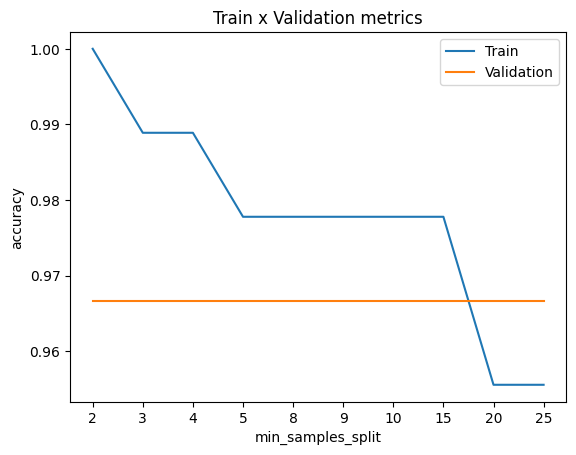

In [26]:
accuracy_list_train=[]
accuracy_list_cv=[]

for min_sample_split in min_sample_split_list:
    #bulding and training the model
    model=RandomForestClassifier(min_samples_split=min_sample_split,random_state=1).fit(X_train,y_train)

    prediction_train=model.predict(X_train)
    prediction_cv=model.predict(X_cv)
    accuracy_train=accuracy_score(prediction_train,y_train)
    accuracy_cv=accuracy_score(prediction_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_sample_split_list )),labels=min_sample_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','Validation'])


c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConvers

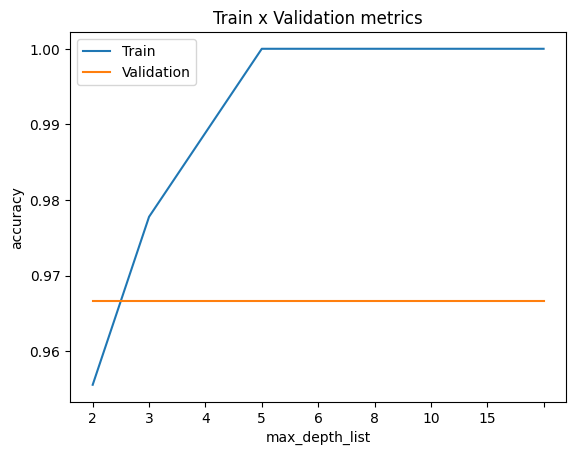

In [27]:
accuracy_list_train=[]
accuracy_list_cv=[]

for max_depth in max_depth_list:
    #bulding and training the model
    model=RandomForestClassifier(max_depth=max_depth,random_state=1).fit(X_train,y_train)

    prediction_train=model.predict(X_train)
    prediction_cv=model.predict(X_cv)
    accuracy_train=accuracy_score(prediction_train,y_train)
    accuracy_cv=accuracy_score(prediction_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth_list')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','Validation'])


c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConvers

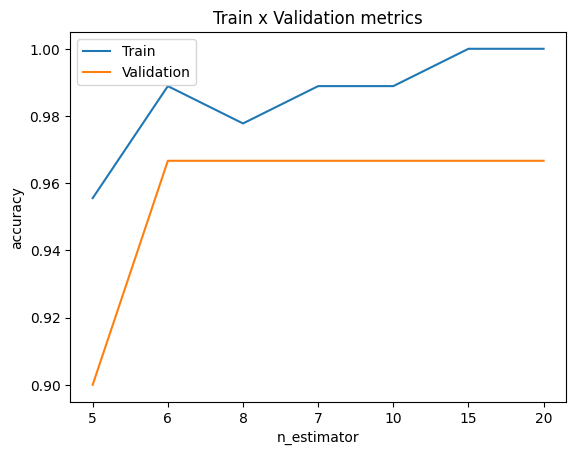

In [28]:
accuracy_list_train=[]
accuracy_list_cv=[]

for n_estimator in n_estimator_list:
    #bulding and training the model
    model=RandomForestClassifier(n_estimators=n_estimator,random_state=1).fit(X_train,y_train)

    prediction_train=model.predict(X_train)
    prediction_cv=model.predict(X_cv)
    accuracy_train=accuracy_score(prediction_train,y_train)
    accuracy_cv=accuracy_score(prediction_cv,y_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_cv.append(accuracy_cv)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimator')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimator_list )),labels=n_estimator_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_cv)
plt.legend(['Train','Validation'])


In [29]:
model=RandomForestClassifier(min_samples_split=18,max_depth=3,n_estimators=6,random_state=1).fit(X_train,y_train)

c:\Users\adith\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [31]:
print(f"train_accuracy ={accuracy_score(model.predict(X_train),y_train)} \n "+
      f"cv accuracy = {accuracy_score(model.predict(X_cv),y_cv)}")

train_accuracy =0.9444444444444444 
 cv accuracy = 0.9


<Axes: >

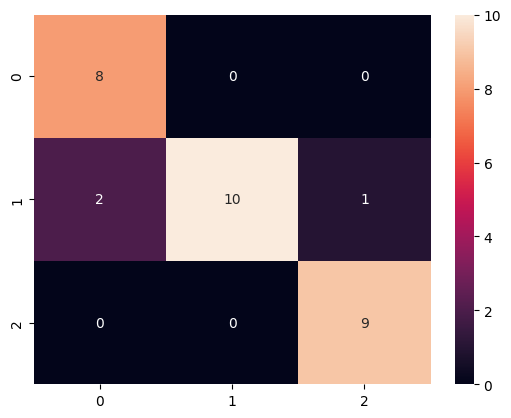

In [33]:
prediction_test=model.predict(X_test)

sns.heatmap(confusion_matrix(prediction_test,y_test),annot=True)